# Roommate Preference Clustering Analysis (k=3)

This notebook:
1. Implements k-means clustering with k=3
2. Visualizes the clusters using dimensionality reduction
3. Interprets cluster characteristics
4. Provides detailed roommate preference profiles

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducibility
np.random.seed(42)

In [15]:
# Load the preprocessed data
data = pd.read_csv('data/processed_data.csv')
question_mapping = pd.read_csv('data/question_mapping.csv')

# Separate features and IDs
X = data.drop('student_id', axis=1)
student_ids = data['student_id']

print("Data shape:", X.shape)
print("\nFeatures:", X.columns.tolist())

Data shape: (14697, 12)

Features: ['Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13']


In [16]:
# Initialize and fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster assignments to original data
data['Cluster'] = clusters

# Calculate metrics
dbi_score = davies_bouldin_score(X, clusters)
chi_score = calinski_harabasz_score(X, clusters)

print("Clustering Metrics:")
print(f"Davies-Bouldin Index: {dbi_score:.3f}")
print(f"Calinski-Harabasz Index: {chi_score:.3f}")

Clustering Metrics:
Davies-Bouldin Index: 1.697
Calinski-Harabasz Index: 3087.147


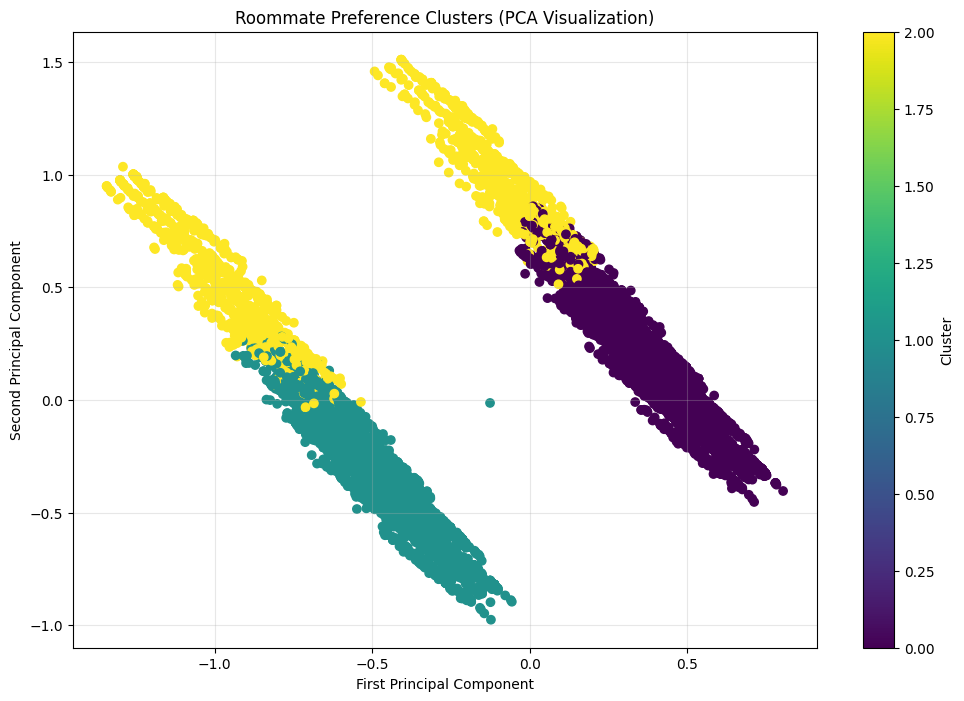

Explained variance ratio: [0.22512431 0.17365149]


In [17]:
# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Roommate Preference Clusters (PCA Visualization)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

# Print explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

In [26]:
def analyze_cluster_characteristics(data, cluster_id, question_mapping):
    """Analyze and display characteristics of a specific cluster"""
    
    # Get cluster data
    cluster_data = data[data['Cluster'] == cluster_id].drop(['Cluster', 'student_id'], axis=1)
    other_data = data[data['Cluster'] != cluster_id].drop(['Cluster', 'student_id'], axis=1)
    
    # Calculate statistics
    cluster_mean = cluster_data.mean()
    other_mean = other_data.mean()
    
    # Calculate difference from other clusters (not overall mean)
    diff_from_others = cluster_mean - other_mean
    
    # Create characteristics DataFrame
    characteristics = pd.DataFrame({
        'Cluster_Mean': cluster_mean,
        'Other_Clusters_Mean': other_mean,
        'Difference': diff_from_others
    })
    
    # Sort by absolute difference to find distinguishing characteristics
    characteristics['Abs_Difference'] = abs(characteristics['Difference'])
    characteristics = characteristics.sort_values('Abs_Difference', ascending=False)
    
    return characteristics

# Analyze each cluster
for cluster_id in range(3):
    print(f"\nCluster {cluster_id} Analysis:")
    print(f"Number of students: {len(data[data['Cluster'] == cluster_id])}")
    
    chars = analyze_cluster_characteristics(data, cluster_id, question_mapping)
    
    print("\nTop distinguishing characteristics:")
    for idx, row in chars.head(5).iterrows():
        diff = row['Difference']
        direction = "higher" if diff > 0 else "lower"
        print(f"- Question {idx}:")
        print(f"  Cluster mean: {row['Cluster_Mean']:.3f}")
        print(f"  Other clusters mean: {row['Other_Clusters_Mean']:.3f}")
        print(f"  {abs(diff):.3f} points {direction} than other clusters")
    print("\n" + "="*80)

# Create updated cluster profiles with distinct characteristics
cluster_profiles = []
for cluster_id in range(3):
    chars = analyze_cluster_characteristics(data, cluster_id, question_mapping)
    size = len(data[data['Cluster'] == cluster_id])
    
    # Get top 3 distinguishing characteristics with their differences
    top_chars = chars.head(3)
    key_chars = [
        f"Q{idx} ({row['Difference']:.3f})" 
        for idx, row in top_chars.iterrows()
    ]
    
    cluster_profiles.append({
        'Cluster': cluster_id,
        'Size': size,
        'Key_Characteristics': '; '.join(key_chars)
    })

# Save updated profiles
pd.DataFrame(cluster_profiles).to_csv('baseline/analysis/cluster_profiles.csv', index=False)


Cluster 0 Analysis:
Number of students: 7554

Top distinguishing characteristics:
- Question Q5:
  Cluster mean: 1.000
  Other clusters mean: 0.121
  0.879 points higher than other clusters
- Question Q6:
  Cluster mean: 0.825
  Other clusters mean: 0.650
  0.175 points higher than other clusters
- Question Q7:
  Cluster mean: 0.789
  Other clusters mean: 0.627
  0.161 points higher than other clusters
- Question Q11:
  Cluster mean: 0.240
  Other clusters mean: 0.383
  0.143 points lower than other clusters
- Question Q4:
  Cluster mean: 0.144
  Other clusters mean: 0.257
  0.113 points lower than other clusters


Cluster 1 Analysis:
Number of students: 5134

Top distinguishing characteristics:
- Question Q5:
  Cluster mean: 0.000
  Other clusters mean: 0.880
  0.880 points lower than other clusters
- Question Q6:
  Cluster mean: 0.851
  Other clusters mean: 0.681
  0.170 points higher than other clusters
- Question Q7:
  Cluster mean: 0.773
  Other clusters mean: 0.677
  0.096 point